# Machine Learning Coursework

### **Problem Statement:** 
To develop a system for automatic detection of 7 types of dry bean seeds based on data captured using a high-resolution camera.

### **Dataset:** 
The Dry Bean Dataset is used for this coursework which is downloaded from the UC Irvine Machine Learning Reporsitory.

**Link:** *https://archive-beta.ics.uci.edu/dataset/602/dry+bean+dataset*

Iron, magnesium, and other minerals, as well as vegetable protein and zinc, are all abundant in beans. The most nutrient-dense beans include a wide range of nutrients necessary for a balanced diet. Beans frequently include high concentrations of nutrients such as fibre, vitamins, minerals, and other phytochemicals. This is crucial since a lack of certain micronutrients might have a negative impact on one's health.

Knowing the type of beans are important for aspects the amount of nutritions, farming and so business. The Bean seed variants should be categorised in order to guarantee consistency and high-quality seed.

# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Data from google drive

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
#df = pd.read_excel('/content/drive/My Drive/Data/Dry_Bean_Dataset.xlsx')

In [10]:
df = pd.read_excel('c:/users/mc928/downloads/Dry_Bean_Dataset.xlsx')

In [11]:
# to view all the columns in the dataset and so setting the display.max_columns to None that means no limit of displaying columns 
pd.set_option('display.max_columns', None)

In [12]:
#let's take a look of datasets
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [13]:
#Columns in dataset
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [14]:
#number of columns
len(df.columns)

17

* The dataset has total number of 17 columns let's talk in berief about the columns.

In [15]:
df.shape #checking the rows and columns of data

(13611, 17)

* The dataset has total 13611 rows and total 17 columns out of which 16 columns are the features and 1 is the target variable.

## Let's get the summary or descriptive analysis of the data

In [16]:
df.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

In [17]:
# check the null values in the dataset
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

* Since the dataset has no null values there is no need to fill the na values.

# Exploratory Data Analysis

* The column "Class" is the dependent variable which consists of types of the beans. Let's explore the class column.

In [18]:
#let's see the unique elements of dependent variable or unique class/types of the beans
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

* There are seven unique type of the beans such as 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', &  'DERMASON'.
* Now let's find out the count of the each class or types in the dataset.

In [19]:
# first groupby the class and secondly let's take the count of the each class. later sorting the value in descending order
df.groupby(['Class'])['Class'].count().sort_values(ascending= False)

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

* From the above result it's clear that the dataset doesn't contain equal or same proportion of each type of class, that means the dataset is imbalance.

### 1. Let's plot the bar plot of the count of the class/types for better understanding.

Text(0, 0.5, 'Count')

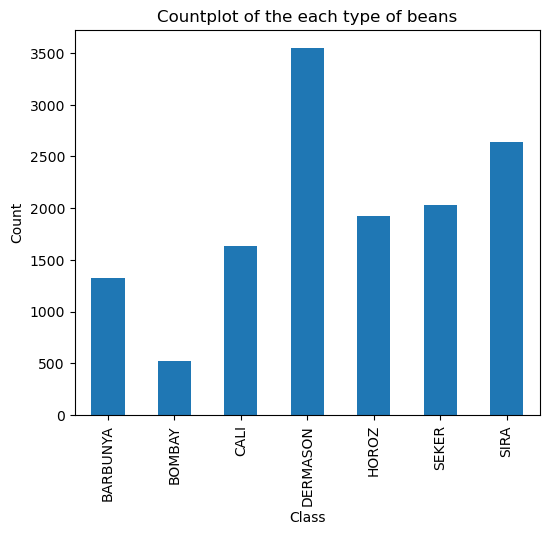

In [20]:
plt.figure(figsize = (6,5)) 
df.groupby(['Class'])['Class'].count().plot.bar()
plt.title('Countplot of the each type of beans')
plt.ylabel('Count')

* A better picture of the counts of the beans can be seen above, the maximum number of beans are of type 'Dermason' with count of 3546, followed by "Sira" with count of 2636 and "Seker" with count of 2027.
* The types of the beans with least count is "Bombay" with only number of 522, followed by "Barbunya" with count of 1322, etc.

### 2. Before moving ahead let's check the correlation between the features

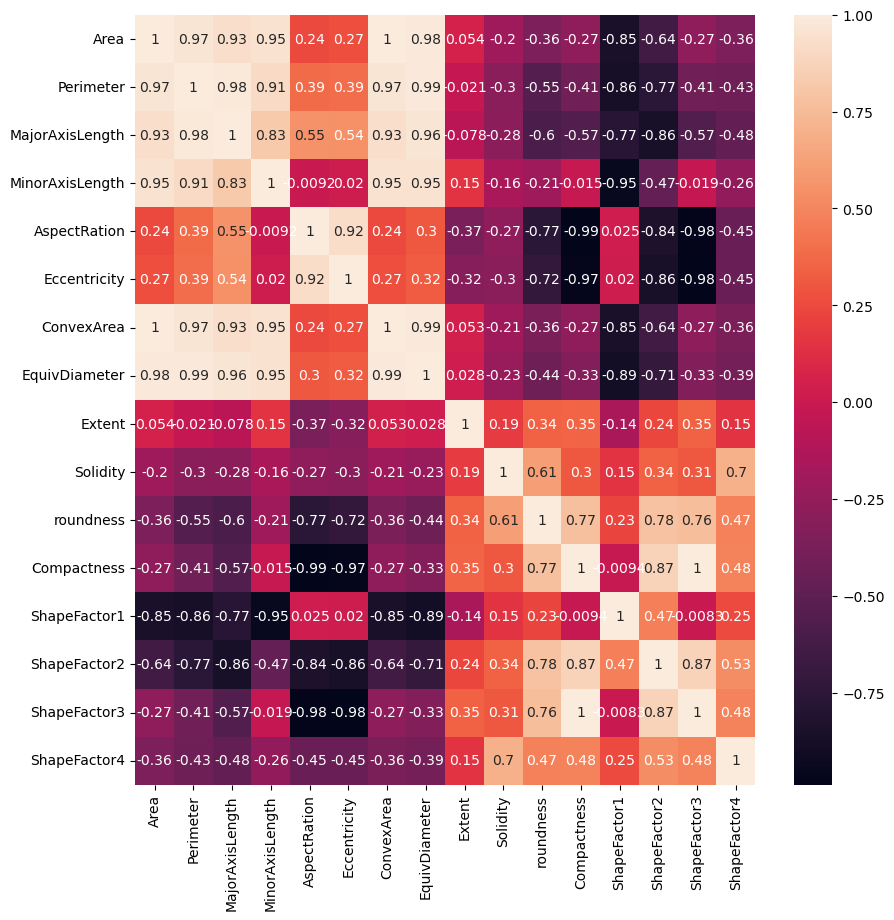

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

* The above heatmap shows collinearity as well as the no collinearity between the features of the dataset.

Text(0, 0.5, 'Roundness')

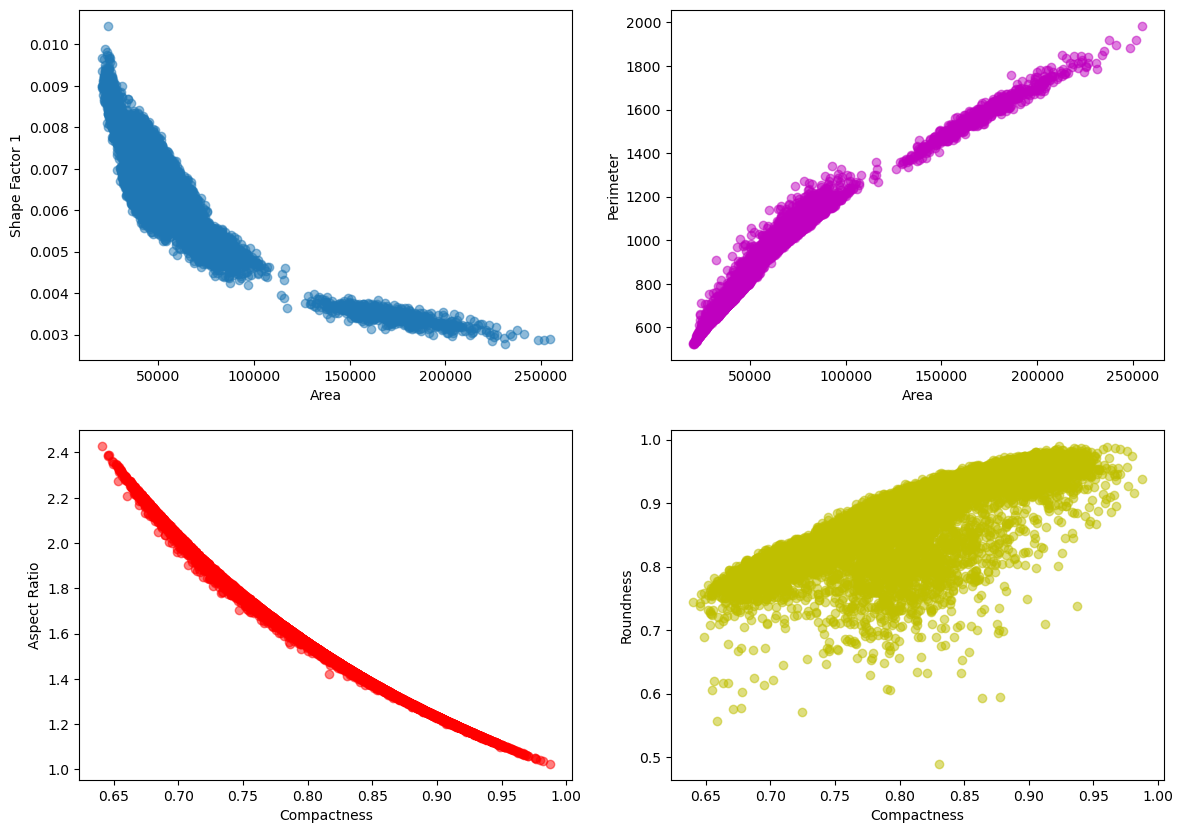

In [22]:
# I'm plotting the scatter to plot to see some of the colinearity and nonn colinearity among the features
plt.figure(figsize = (14,10))

plt.subplot(2,2,1)
plt.scatter(df.Area,df.ShapeFactor1, alpha = 0.5)
plt.xlabel("Area")
plt.ylabel('Shape Factor 1')

plt.subplot(2,2,2)
plt.scatter(df.Area,df.Perimeter, color = 'm', alpha = 0.5)
plt.xlabel("Area")
plt.ylabel('Perimeter')

plt.subplot(2,2,3)
plt.scatter(df.Compactness,df.AspectRation, color = 'r', alpha = 0.5)
plt.xlabel("Compactness")
plt.ylabel('Aspect Ratio')

plt.subplot(2,2,4)
plt.scatter(df.Compactness,df.roundness, color = 'y', alpha = 0.5)
plt.xlabel("Compactness")
plt.ylabel('Roundness')



* The above scatter plot shows some of the linearity and non- linearity between them.

### 3. Let's have a look on the feature of all the class with the help of the box plot.

In [23]:
independent_variable = df.drop('Class', axis = 1) # dropping the class to get only independent features

In [24]:
independent_variable_columns = independent_variable.columns # just the name of the independent features columns

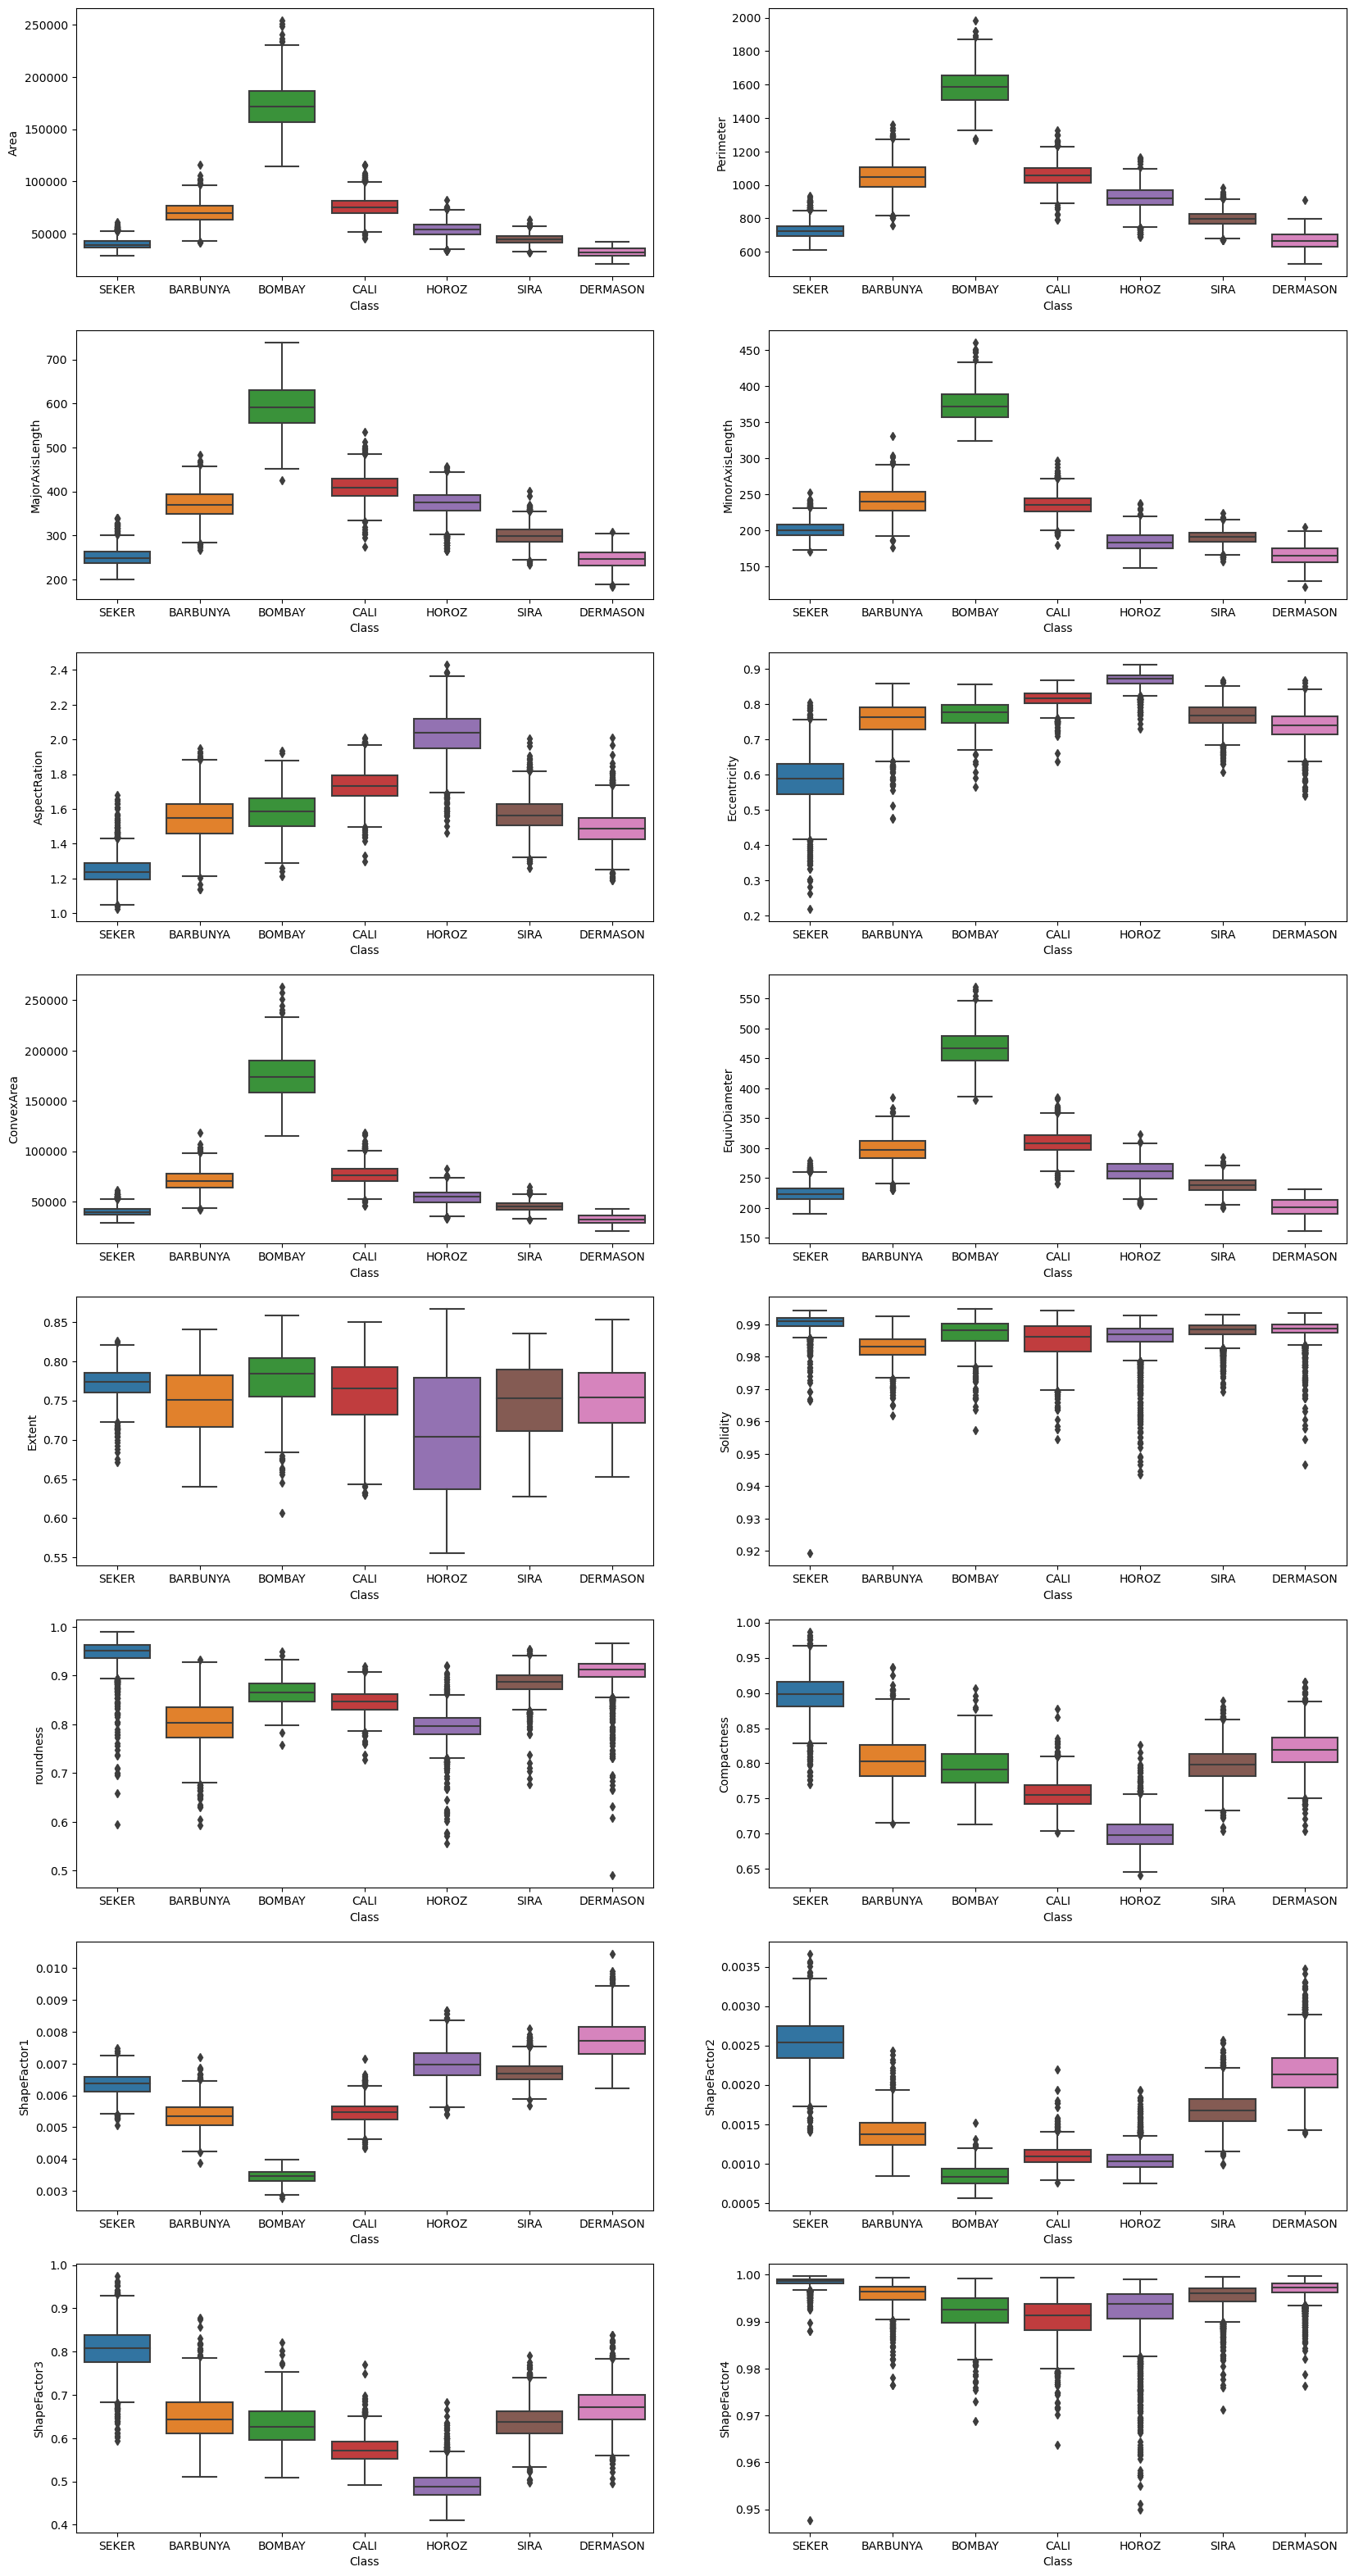

In [25]:
figure, axes = plt.subplots(8,2, figsize = (20,40))
for feature_name, ax in zip(independent_variable_columns, axes.flatten()):
  sns.boxplot(x = df.Class, y = df[feature_name], ax = ax)

* the bombay beans shows the complete different feature as it's easily spottable

### 4. Let's explore the distribution of datapoints of every features in the dataset

<Axes: xlabel='Area', ylabel='Count'>

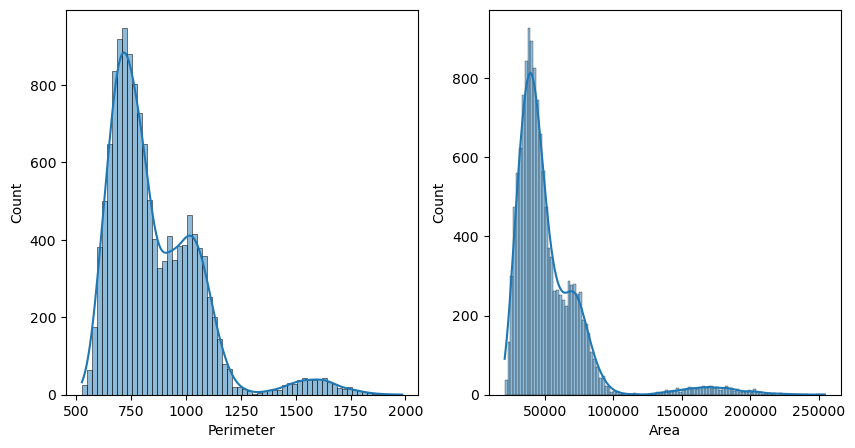

In [26]:
#plotting the histogram to check how data is distributed
figure, axes = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(df['Perimeter'], kde = True, ax = axes[0])
sns.histplot(df['Area'], kde = True, ax = axes[1])

* checking whether the tail data points are actual genuine points or outlier

In [27]:
(df.loc[(df['Perimeter']>=1250), "Class"]).value_counts() 

BOMBAY      522
BARBUNYA     22
CALI          9
Name: Class, dtype: int64

In [28]:
df.loc[(df['Area']>=125000), "Class"].value_counts()

BOMBAY    520
Name: Class, dtype: int64

* For an instance I thought that the feature **Perimeter** with the values greater than 1250 are outliers, but no, they aren't. These points which seems like outliers they are the actual perimeter value of class "Bombay" and they can't be treated as Outliers.
* Sames goes with the the feature **Area** at first I thought that the area above the 125000 is outlier, but they no they are the actual area of the bean type **Bombay.**

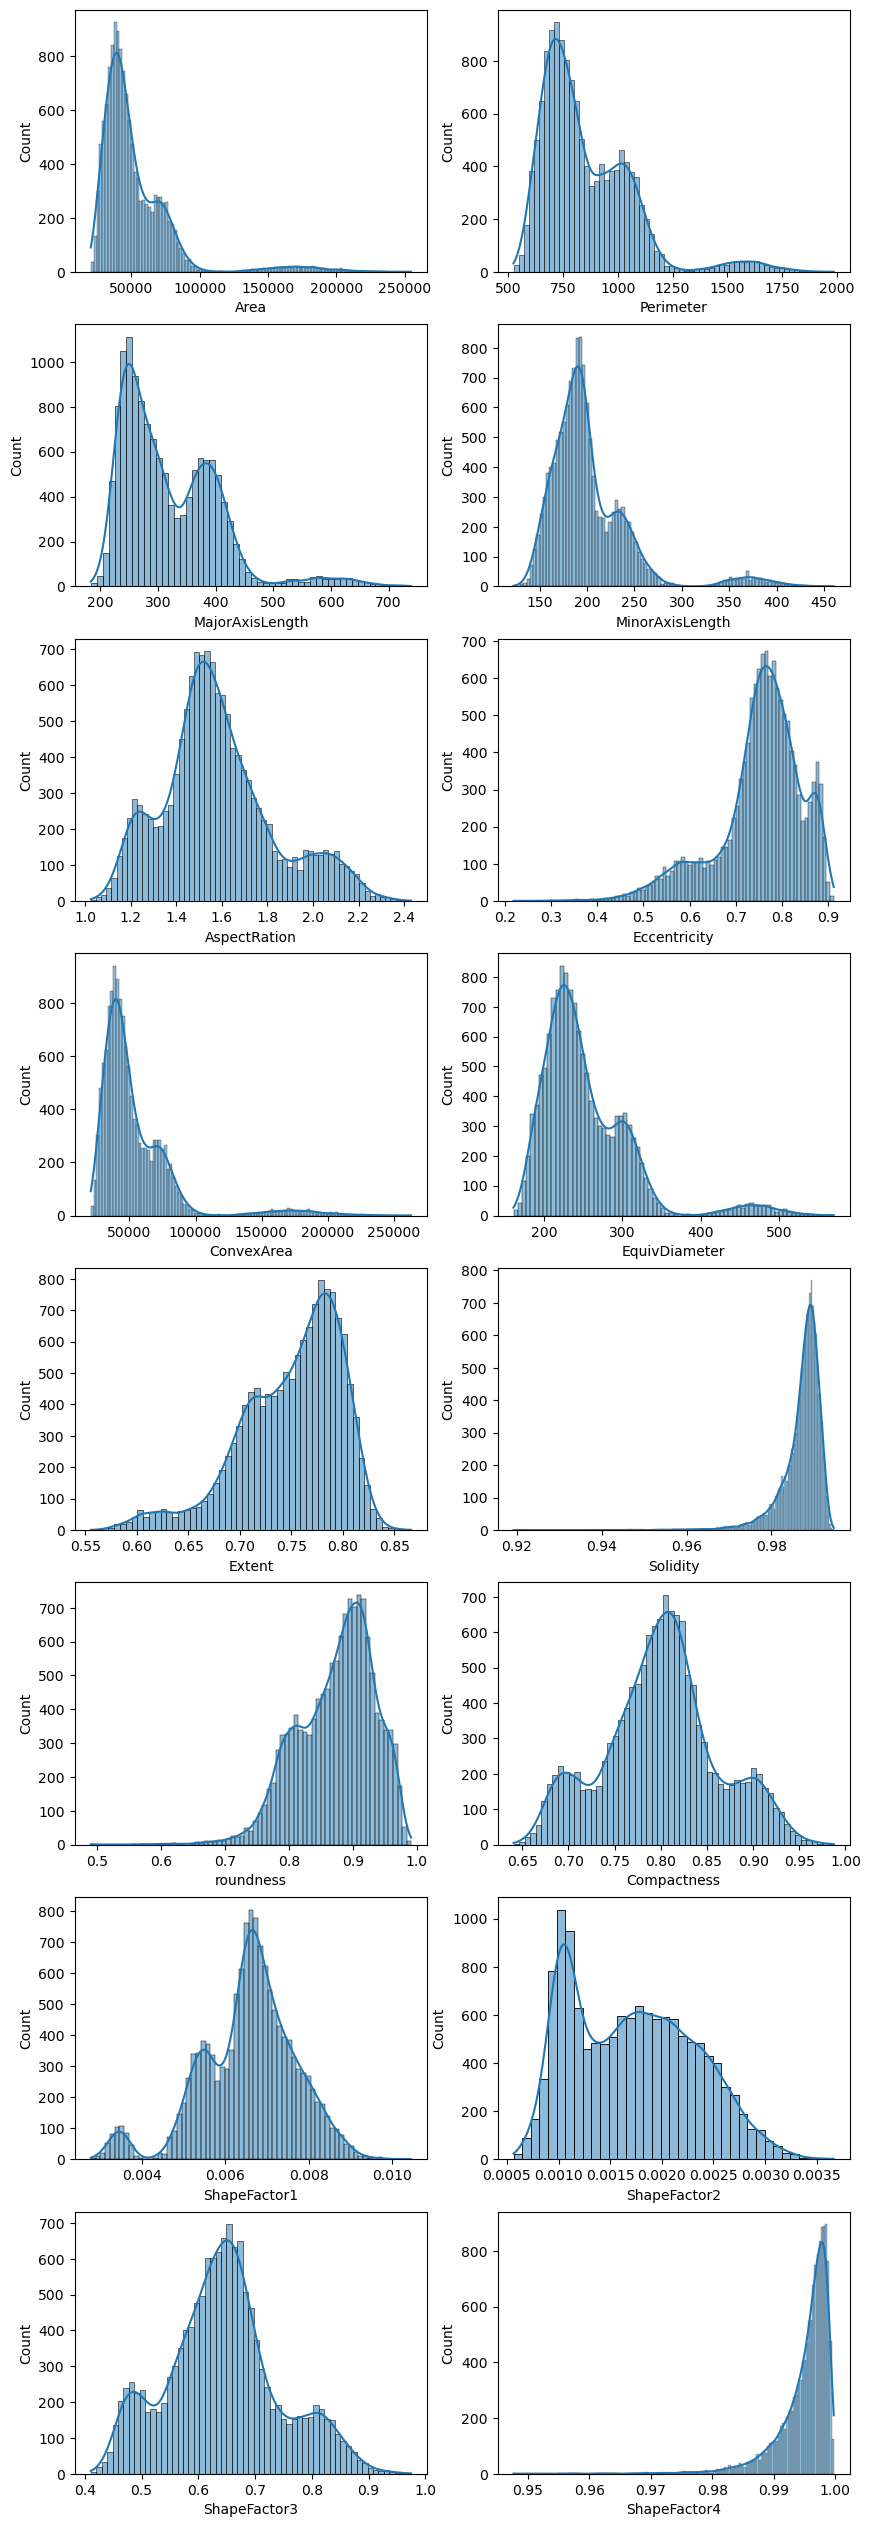

In [29]:
figure, axes = plt.subplots(8,2, figsize = (10, 32))
for feature_name, ax in zip(independent_variable_columns, axes.flatten()):
  sns.histplot(df[feature_name], kde  = True, ax = ax)

* The tail of the distribution might feel like they are outlier but actualy they aren't.

# Feature Engineering

### 1. Finding the missing values if any

In [30]:
df.isnull().values.any()

False

In [31]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

* There is no null values found in any of the columns of the dataframe.

### Since the target variable is text data and machinelearning algorithm doesn't work on text data. So, we need to convert it into the number data.


In [32]:
np.sort(df.Class.unique()) # taking unique value in column class and sorting simultaneously

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

* labelling the target variable

In [33]:
df['target'] = df.Class.apply(lambda x: 0 if x == 'BARBUNYA' else x)

In [34]:
df.groupby(['target'])['target'].count()

target
0           1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
Name: target, dtype: int64

In [35]:
df['target'] = df.target.apply(lambda x: 1 if x == 'BOMBAY' else x)

In [36]:
df['target'] = df.target.apply(lambda x: 2 if x == 'CALI' else x)

In [37]:
df['target'] = df.target.apply(lambda x: 3 if x == 'DERMASON' else x)

In [38]:
df['target'] = df.target.apply(lambda x: 4 if x == 'HOROZ' else x)


In [39]:
df['target'] = df.target.apply(lambda x: 5 if x == 'SEKER' else x)

In [40]:
df['target'] = df.target.apply(lambda x: 6 if x == 'SIRA' else x)

In [41]:
df.groupby(['target'])['target'].count()

target
0    1322
1     522
2    1630
3    3546
4    1928
5    2027
6    2636
Name: target, dtype: int64

* Now we have converted the text column into number column so lets drop the text column.

In [42]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'target'],
      dtype='object')

In [43]:
df.drop(['Class'], axis = 1, inplace = True)

In [44]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  target  
0     0.913358      0.007332      0.003147      0.834222      0.998724       5  
1     0.953861      0.006979      0.003564      0.909851      0.998430       5  
2     0.908774      0.007244      0.003048      0.825871      0.999066       5  
3     0.928329      0.007017      0.003215      0.861794      0.994199       5  
4     0.970516      0.006697      0.003665      0.941900      0.999166       5

### Splitting the target variable and the independent variable

In [45]:
X = df.drop(['target'], axis = 1)

In [46]:
y = df.target

### Feature Scaling
* All the features in the dataset are not the same range or scale so lets scale them on the similar range.
* Feature scaling helps to accelerate the minimization of the cost function and smooth the gradient descent process to enhance the optimisation process.

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
x_scaled = scaler.fit_transform(X)

In [50]:
x_scaled[:3]

array([[-0.84074853, -1.1433189 , -1.30659814, -0.63115304, -1.56505251,
        -2.18572039, -0.84145059, -1.0633406 ,  0.28908744,  0.36761343,
         1.42386707,  1.8391164 ,  0.68078638,  2.40217287,  1.92572347,
         0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, -0.43444458, -1.96978438,
        -3.68603953, -0.82610154, -1.04421674,  0.69747682, -0.46290658,
         0.23105404,  2.49544929,  0.3679669 ,  3.10089314,  2.68970162,
         0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, -0.58573461, -1.51429132,
        -2.04533608, -0.80870371, -1.00808399,  0.57819522,  0.51841687,
         1.25286494,  1.76484275,  0.60312889,  2.23509147,  1.84135576,
         0.91675514]])

### Splitting the dataset into train set and test set
* As we have seen the dataset  is slight imbalance that means not all types of beans are in same proportion. 
* So, to avoid training model on imbalance data using **stratify method** which will split the dataset with equal propotion of types of beans.

In [51]:
#importing train/-test_split to split the data
from sklearn.model_selection import train_test_split 

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 10)

In [53]:
len(x_train), len(x_test)

(10888, 2723)

In [54]:
len(y_train), len(y_test)

(10888, 2723)

# Model Training
* Before proceeding to train models let's first import the necessary models which we will be using for this classification problem.

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

## 1. Let's Classify Beans Using Logistic Regression.

In [56]:
lgrcf = LogisticRegression()

In [57]:
lgrcf.fit(x_train,y_train)

LogisticRegression()

In [58]:
lgrcf.score(x_test,y_test)

0.7047374219610724

In [59]:
lgrcf.score(x_train,y_train)

0.6994856722997795

* The train score and the test score both are approximately same so we can say that this model is not an underfitting model nor an overfit model.
* Even though the accuracy is not so good i.e. ~ 70%, buts still this is a best fit model.

In [60]:
y_pred = lgrcf.predict(x_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
#Classification report of the decision tree classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       265
           1       1.00      1.00      1.00       104
           2       0.73      0.75      0.74       326
           3       0.81      0.87      0.84       709
           4       0.61      0.54      0.58       386
           5       0.70      0.62      0.66       406
           6       0.57      0.65      0.61       527

    accuracy                           0.70      2723
   macro avg       0.73      0.71      0.72      2723
weighted avg       0.70      0.70      0.70      2723



In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
#plotting the confusion matrix of the result of logistic regression
cm = confusion_matrix(y_test,y_pred)

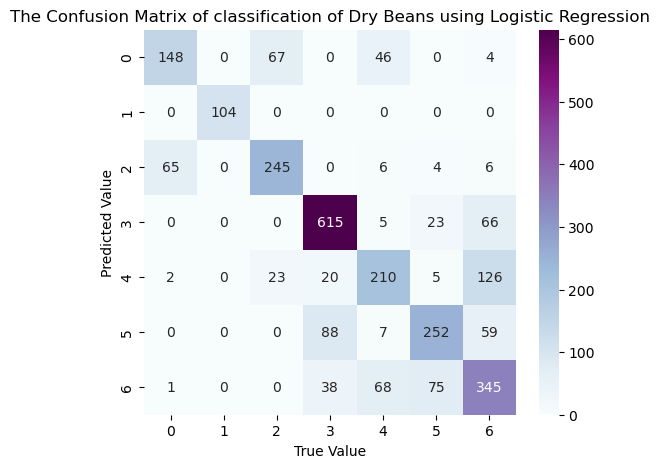

In [65]:
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot = True, cmap='BuPu', fmt='.3g')
plt.title('The Confusion Matrix of classification of Dry Beans using Logistic Regression')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()  

In [66]:
# checking the accuracy using the cross validation method
cross_val_score(lgrcf,x_scaled,y, cv = 6)

array([0.66989863, 0.96959013, 0.98016747, 0.97486772, 0.96119929,
       0.62962963])

In [67]:
np.average(cross_val_score(lgrcf,x_scaled,y,cv = 6))

0.8642254808762325

* Now when we're using cross validation score, first it splits the dataset into 6 folds and then train and test on individual sets.
* After training and testing model on all the 6 folds, the average score is quite high than the traditional method of train_test_split.

## 2. Let's Classify Beans Using Decision Tree Classifier.

In [68]:
dclf = DecisionTreeClassifier()

In [69]:
dclf.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
dclf.score(x_test,y_test)

0.8905618802791039

* The accuracy with of the decision tree classifier is really good i.e **89.05%**

In [71]:
y_pred_d = dclf.predict(x_test)

In [72]:
#Classification report of the decision tree classifier
print(classification_report(y_test,y_pred_d))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       265
           1       0.99      1.00      1.00       104
           2       0.90      0.92      0.91       326
           3       0.89      0.89      0.89       709
           4       0.93      0.91      0.92       386
           5       0.94      0.91      0.92       406
           6       0.81      0.84      0.82       527

    accuracy                           0.89      2723
   macro avg       0.91      0.90      0.91      2723
weighted avg       0.89      0.89      0.89      2723



In [73]:
dcm = confusion_matrix(y_test,y_pred_d)

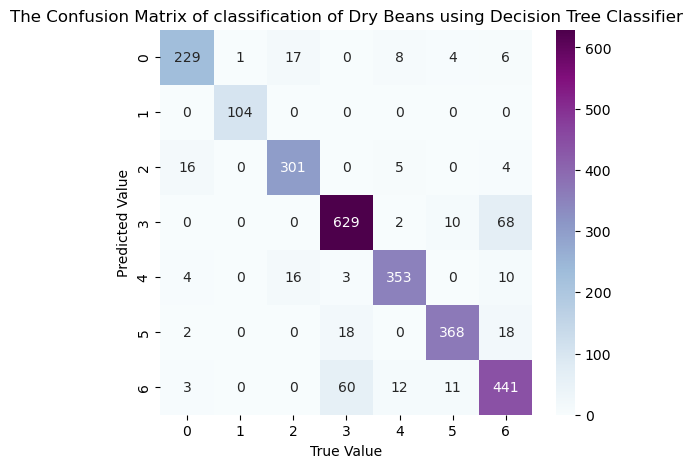

In [74]:
plt.figure(figsize = (6,5))
sns.heatmap(dcm,annot = True, cmap='BuPu', fmt='.3g')
plt.title('The Confusion Matrix of classification of Dry Beans using Decision Tree Classifier')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show() 

In [75]:
cross_val_score(dclf, X,y, cv = 6)

array([0.48832085, 0.7254297 , 0.91185544, 0.71428571, 0.66887125,
       0.27910053])

In [76]:
np.average(cross_val_score(dclf,X,y, cv = 6))

0.6367474256840594

In [77]:
# decision tree classifier using criterion as entropy
declf = DecisionTreeClassifier(criterion = "entropy")

In [78]:
declf.fit(x_train,y_train)
declf.score(x_test,y_test)

0.8905618802791039

In [79]:
cross_val_score(DecisionTreeClassifier(criterion='entropy'), x_train,y_train, cv = 6)

array([0.90137741, 0.89752066, 0.89917355, 0.89311295, 0.91841235,
       0.90848953])

In [80]:
np.average(cross_val_score(DecisionTreeClassifier(criterion='entropy'), x_train,y_train, cv = 6))

0.9010847676929665

## 3. Let's classify Beans using Random Forest Classifier. 

**(Note: This one is the part of extra task)**

In [81]:
rfclf = RandomForestClassifier()
rfclf.fit(x_train,y_train)
rfclf.score(x_test,y_test)

0.914799853103195

In [82]:
y_pred_rf = rfclf.predict(x_test)

In [83]:
#Classification report of the decision tree classifier
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       265
           1       0.99      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.90      0.92      0.91       709
           4       0.96      0.92      0.94       386
           5       0.95      0.93      0.94       406
           6       0.86      0.86      0.86       527

    accuracy                           0.91      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.91      0.91      2723



In [84]:
cmrf = confusion_matrix(y_test,y_pred_rf)

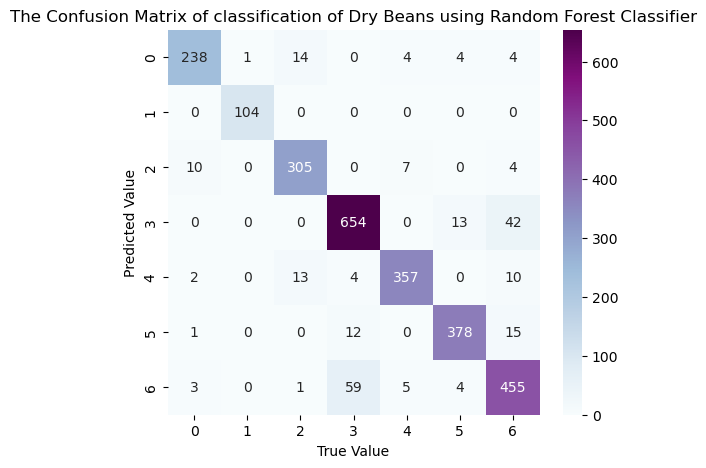

In [85]:
plt.figure(figsize = (6,5))
sns.heatmap(cmrf,annot = True, cmap='BuPu', fmt='.3g')
plt.title('The Confusion Matrix of classification of Dry Beans using Random Forest Classifier')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [86]:
#n_estimator = [10,50,100]
#criter  = ['gini', 'entropy', 'log_loss']
#avg_score = {}
#for nval in n_estimator:
    #for cval in criter:
        #cv_scores = cross_val_score(RandomForestClassifier(n_estimators = nval, criterion = cval),X, y, cv=6)
        #avg_score[cval + '_' + str(nval)] = np.average(cv_scores)

#avg_score

## 4. Lets Classify Beans using Support Vector Classifier

In [88]:
svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.6320235034887991

* With the default parameters the score of the support vector machine is really bad i.e. **63.20%** and later we will see the score by the help of hyper parameter tuning

In [89]:
y_pred_svc = svc.predict(x_test)

In [90]:
#Classification report of the decision tree classifier
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.59      0.06      0.11       265
           1       1.00      1.00      1.00       104
           2       0.59      0.88      0.70       326
           3       0.77      0.84      0.80       709
           4       0.61      0.58      0.59       386
           5       0.39      0.25      0.31       406
           6       0.56      0.74      0.64       527

    accuracy                           0.63      2723
   macro avg       0.64      0.62      0.59      2723
weighted avg       0.62      0.63      0.60      2723



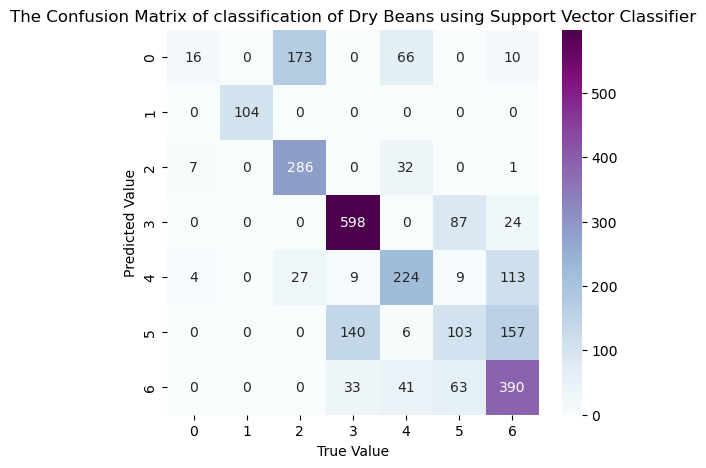

In [91]:
cmsvc = confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize = (6,5))
sns.heatmap(cmsvc,annot = True, cmap='BuPu', fmt='.3g')
plt.title('The Confusion Matrix of classification of Dry Beans using Support Vector Classifier')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

## 5. Classifying using KNN

In [96]:
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    print(f"for K = {i}, the score is: {knn.score(x_test,y_test)}")

for K = 1, the score is: 0.7432978332721263
for K = 3, the score is: 0.7366874770473743
for K = 5, the score is: 0.7260374586852736
for K = 7, the score is: 0.7194271024605214
for K = 9, the score is: 0.7175908923980904
for K = 11, the score is: 0.7131839882482556
for K = 13, the score is: 0.7080426000734484
for K = 15, the score is: 0.702533969886155
for K = 17, the score is: 0.694454645611458
for K = 19, the score is: 0.6893132574366507


* The value of k = 5 seems best k value

In [97]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7260374586852736

In [98]:
y_pred_knn = knn.predict(x_test)

In [99]:
#Classification report of the decision tree classifier
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       265
           1       1.00      1.00      1.00       104
           2       0.68      0.67      0.67       326
           3       0.79      0.90      0.84       709
           4       0.71      0.63      0.67       386
           5       0.80      0.61      0.69       406
           6       0.67      0.73      0.70       527

    accuracy                           0.73      2723
   macro avg       0.74      0.72      0.73      2723
weighted avg       0.73      0.73      0.72      2723



In [100]:
cmknn = confusion_matrix(y_test,y_pred_knn)
print(cmknn)

[[143   0  81   1  32   0   8]
 [  0 104   0   0   0   0   0]
 [ 82   0 217   0  26   0   1]
 [  0   0   0 638   0  36  35]
 [ 35   0  22  12 243   1  73]
 [  0   0   0  80   4 249  73]
 [  6   0   0  78  35  25 383]]


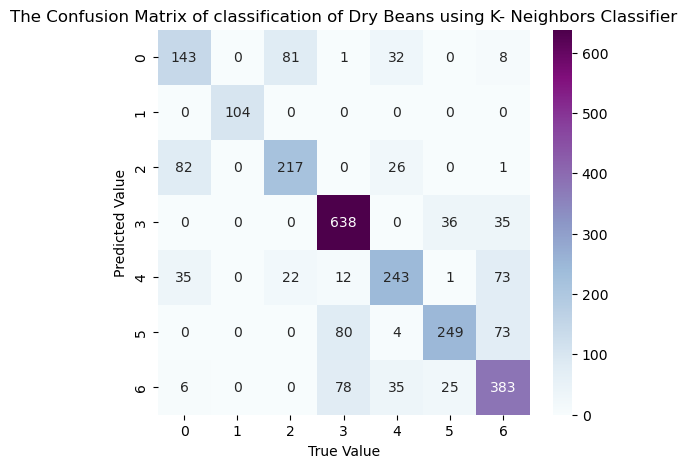

In [101]:
plt.figure(figsize = (6,5))
sns.heatmap(cmknn,annot = True, cmap='BuPu', fmt='.3g')
plt.title('The Confusion Matrix of classification of Dry Beans using K- Neighbors Classifier')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [102]:
cross_val_score(knn,x_train,y_train, cv = 6)

array([0.71460055, 0.70743802, 0.71625344, 0.7030303 , 0.72601985,
       0.71168688])

In [103]:
np.average(cross_val_score(knn,x_train,y_train, cv = 6))

0.7131715065863607

# 6. Classifying using Guassian Naive bayes Classifier

In [104]:
gnbclf = GaussianNB()

In [105]:
gnbclf.fit(x_train,y_train)

GaussianNB()

In [106]:
gnbclf.score(x_test,y_test)

0.7631289019463827

In [107]:
gnbclf.score(x_train,y_train)

0.7645113886847906

In [108]:
y_pred_gn = gnbclf.predict(x_test)

In [109]:
#Classification report of the decision tree classifier
print(classification_report(y_test,y_pred_gn))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56       265
           1       0.99      1.00      1.00       104
           2       0.68      0.79      0.73       326
           3       0.86      0.83      0.85       709
           4       0.79      0.77      0.78       386
           5       0.69      0.69      0.69       406
           6       0.73      0.79      0.76       527

    accuracy                           0.76      2723
   macro avg       0.77      0.77      0.77      2723
weighted avg       0.76      0.76      0.76      2723



In [110]:
cmgn = confusion_matrix(y_test,y_pred_gn)
print(cmgn)

[[128   1 101   0  26   0   9]
 [  0 104   0   0   0   0   0]
 [ 50   0 259   0  16   0   1]
 [  0   0   0 591   0  81  37]
 [ 13   0  21  10 298   1  43]
 [  1   0   0  56   2 281  66]
 [  0   0   0  30  34  46 417]]


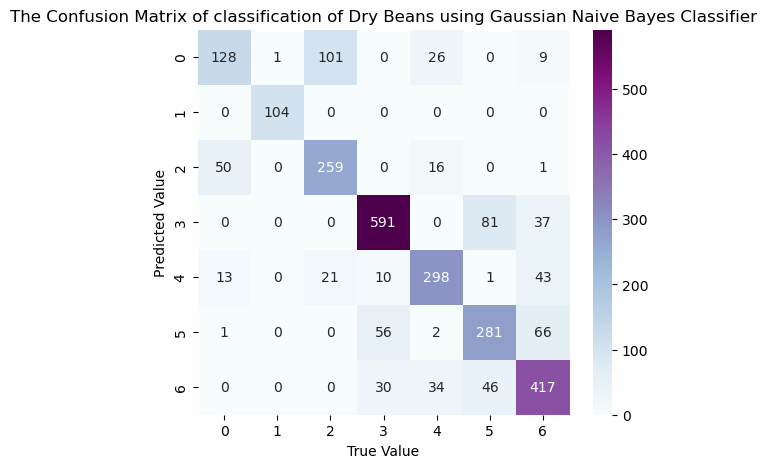

In [111]:
plt.figure(figsize = (6,5))
sns.heatmap(cmgn,annot = True, cmap='BuPu', fmt='.3g')
plt.title('The Confusion Matrix of classification of Dry Beans using Gaussian Naive Bayes Classifier')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [112]:
cross_val_score(GaussianNB(),x_train,y_train, cv = 6)

array([0.77796143, 0.74820937, 0.76639118, 0.76033058, 0.77508269,
       0.75854465])

In [113]:
np.average(cross_val_score(GaussianNB(),x_train,y_train, cv = 6))

0.7644199841453525

* We've seen all the classifiers by implementing them individually,and seen their score as well.
* let's do the hyper parameter tuning to find out the best parameter and the best algorithm or model to classify the beans.

## Hyperparameter Tuning to find out the best parameters and Best Model for this problem.

* For hyperparameter tuning using the GridSearchCV is the best option but it requires very high computation power and to avoid that we can use randomized search cv intead.
* By using the RandomizedSearchCV to minimize the requirement of high computation power let's implement the individual models first to find out their best parameters.

In [114]:
from sklearn.model_selection import RandomizedSearchCV

**1. Logistic regression**

In [115]:
rscv = RandomizedSearchCV(LogisticRegression(), {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                                                 'penalty': ['l2'],
                                                 'C': [100, 10, 1.0, 0.1, 0.01]}, cv = 6, return_train_score = False, n_iter = 100)

In [116]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']})

In [117]:
rscv.cv_results_

{'mean_fit_time': array([1.42384509, 0.11516277, 0.1520013 , 1.54369052, 0.11183178,
        0.15550514, 1.5013812 , 0.11434094, 0.15783079, 1.47578891,
        0.1095022 , 0.15342343, 1.38963731, 0.11166497, 0.1500092 ]),
 'std_fit_time': array([0.02998633, 0.0041374 , 0.00692837, 0.04136988, 0.00177211,
        0.00788544, 0.07869976, 0.00256304, 0.00660944, 0.05595186,
        0.00189365, 0.00510668, 0.08389102, 0.00249545, 0.00807647]),
 'mean_score_time': array([0.00132986, 0.00150355, 0.00200784, 0.00166714, 0.00150128,
        0.0011663 , 0.00116841, 0.00133284, 0.00169082, 0.00133483,
        0.00150005, 0.00164926, 0.001834  , 0.00116865, 0.00099973]),
 'std_score_time': array([4.67469779e-04, 5.02785435e-04, 2.18695174e-05, 7.47596419e-04,
        5.01038547e-04, 3.71407873e-04, 3.73436000e-04, 4.70388370e-04,
        4.42626140e-04, 4.71851544e-04, 4.98616813e-04, 4.09370156e-04,
        3.72263125e-04, 3.72156349e-04, 2.13987224e-07]),
 'param_solver': masked_array(data=['n

In [118]:
dfrs = pd.DataFrame(rscv.cv_results_)

In [119]:
dfrs[['params','mean_test_score', 'rank_test_score']]

params  mean_test_score  \
0   {'solver': 'newton-cg', 'penalty': 'l2', 'C': ...         0.918810   
1      {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}         0.701598   
2   {'solver': 'liblinear', 'penalty': 'l2', 'C': ...         0.869122   
3   {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}         0.918811   
4       {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}         0.705546   
5   {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}         0.869214   
6   {'solver': 'newton-cg', 'penalty': 'l2', 'C': ...         0.918168   
7      {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}         0.701597   
8   {'solver': 'liblinear', 'penalty': 'l2', 'C': ...         0.869490   
9   {'solver': 'newton-cg', 'penalty': 'l2', 'C': ...         0.917800   
10     {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}         0.703159   
11  {'solver': 'liblinear', 'penalty': 'l2', 'C': ...         0.869214   
12  {'solver': 'newton-cg', 'penalty': 'l2', 'C': ...         0.916423   
13    {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}         0.705271   
14  {'solver': 'liblinear', 'penalty': 'l2', 'C': ...         0.869857   

    rank_test_score  
0                 2  
1                14  
2                10  
3                 1  
4                11  
5                 9  
6                 3  
7                15  
8                 7  
9                 4  
10               13  
11                8  
12                5  
13               12  
14                6

**2. Decision Tree Classifier**

In [120]:
rsdt = RandomizedSearchCV(DecisionTreeClassifier(), {'criterion': ['gini', 'entropy', 'log_loss']}, cv = 6, return_train_score = False, n_iter = 100)

In [121]:
rsdt.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss']})

In [122]:
rsdt.cv_results_

{'mean_fit_time': array([0.10923239, 0.13907528, 0.13858577]),
 'std_fit_time': array([0.00383055, 0.00371634, 0.00529574]),
 'mean_score_time': array([0.00133336, 0.00126263, 0.00166607]),
 'std_score_time': array([0.00047171, 0.00039199, 0.00047095]),
 'param_criterion': masked_array(data=['gini', 'entropy', 'log_loss'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'},
  {'criterion': 'entropy'},
  {'criterion': 'log_loss'}],
 'split0_test_score': array([0.89090909, 0.89917355, 0.89972452]),
 'split1_test_score': array([0.89366391, 0.89807163, 0.89586777]),
 'split2_test_score': array([0.8969697 , 0.8969697 , 0.90247934]),
 'split3_test_score': array([0.90137741, 0.89201102, 0.89146006]),
 'split4_test_score': array([0.89966924, 0.91289967, 0.90959206]),
 'split5_test_score': array([0.90904079, 0.90683572, 0.90352811]),
 'mean_test_score': array([0.89860502, 0.90099355, 0.90044198]),
 'std_test_score': ar

In [123]:
dfrsdt = pd.DataFrame(rsdt.cv_results_)

In [124]:
dfrsdt[['params','mean_test_score', 'rank_test_score']]

params  mean_test_score  rank_test_score
0      {'criterion': 'gini'}         0.898605                3
1   {'criterion': 'entropy'}         0.900994                1
2  {'criterion': 'log_loss'}         0.900442                2

**3. Random Forest Classifier** (**NOTE: PART OF AN EXTRA TASK**)

In [125]:
rsrf = RandomizedSearchCV(RandomForestClassifier(), {'n_estimators':[10,100,200],
                                                     'criterion': ['gini', 'entropy', 'log_loss'],
                                                    'max_features': ['sqrt', 'log2']}, cv = 6, return_train_score = False, n_iter = 100)

In [126]:
rsrf.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 100, 200]})

In [127]:
rsrf.cv_results_

{'mean_fit_time': array([0.27636997, 2.69795354, 5.23546724, 0.263351  , 2.6034265 ,
        5.27069608, 0.31693455, 3.10008204, 6.16371636, 0.3105104 ,
        3.07651885, 6.18287841, 0.31277053, 3.15292903, 6.21252275,
        0.3178498 , 3.09975255, 6.18894128]),
 'std_fit_time': array([0.00653107, 0.02093109, 0.08144228, 0.00896386, 0.01161481,
        0.07938266, 0.0050064 , 0.04663892, 0.07334847, 0.00865433,
        0.02036879, 0.0607992 , 0.0047727 , 0.06781979, 0.09962444,
        0.01116576, 0.02850359, 0.06208165]),
 'mean_score_time': array([0.00333218, 0.02100054, 0.03766509, 0.00316687, 0.02016552,
        0.03837188, 0.00300066, 0.01883399, 0.03634858, 0.00316683,
        0.01849933, 0.03651086, 0.00333269, 0.01883368, 0.03718305,
        0.00333452, 0.01966612, 0.03633348]),
 'std_score_time': array([4.72610966e-04, 1.29533523e-03, 1.10512692e-03, 3.72461088e-04,
        1.77220650e-03, 1.48335749e-03, 3.28541225e-06, 3.73239767e-04,
        9.22047855e-04, 3.72686643e-

In [128]:
dfrf = pd.DataFrame(rsrf.cv_results_)

In [129]:
dfrf[['params', 'mean_test_score','rank_test_score']]

params  mean_test_score  \
0   {'n_estimators': 10, 'max_features': 'sqrt', '...         0.921382   
1   {'n_estimators': 100, 'max_features': 'sqrt', ...         0.925882   
2   {'n_estimators': 200, 'max_features': 'sqrt', ...         0.926525   
3   {'n_estimators': 10, 'max_features': 'log2', '...         0.920831   
4   {'n_estimators': 100, 'max_features': 'log2', ...         0.926709   
5   {'n_estimators': 200, 'max_features': 'log2', ...         0.926525   
6   {'n_estimators': 10, 'max_features': 'sqrt', '...         0.920096   
7   {'n_estimators': 100, 'max_features': 'sqrt', ...         0.926984   
8   {'n_estimators': 200, 'max_features': 'sqrt', ...         0.927260   
9   {'n_estimators': 10, 'max_features': 'log2', '...         0.924412   
10  {'n_estimators': 100, 'max_features': 'log2', ...         0.927168   
11  {'n_estimators': 200, 'max_features': 'log2', ...         0.927168   
12  {'n_estimators': 10, 'max_features': 'sqrt', '...         0.920372   
13  {'n_estimators': 100, 'max_features': 'sqrt', ...         0.926616   
14  {'n_estimators': 200, 'max_features': 'sqrt', ...         0.927443   
15  {'n_estimators': 10, 'max_features': 'log2', '...         0.922576   
16  {'n_estimators': 100, 'max_features': 'log2', ...         0.927811   
17  {'n_estimators': 200, 'max_features': 'log2', ...         0.927260   

    rank_test_score  
0                15  
1                12  
2                11  
3                16  
4                 8  
5                10  
6                18  
7                 7  
8                 4  
9                13  
10                5  
11                6  
12               17  
13                9  
14                2  
15               14  
16                1  
17                3

4. Support Vector Classifier

In [130]:
rssv = RandomizedSearchCV(SVC(gamma = 'auto'), {"C":[1,10,20], 'kernel':['rbf','linear']},cv = 6, return_train_score = False,
                          n_iter = 100)

In [131]:
rssv.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=SVC(gamma='auto'), n_iter=100,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [132]:
rssv.cv_results_

{'mean_fit_time': array([ 5.94591296, 19.29895349,  6.2497495 , 23.48487691,  6.0901167 ,
        19.09146663]),
 'std_fit_time': array([0.09173903, 2.41199559, 0.12358435, 2.36495287, 0.02858927,
        1.47216955]),
 'mean_score_time': array([1.02738329, 0.03566643, 1.02944088, 0.0353328 , 1.00033387,
        0.03683309]),
 'std_score_time': array([0.0189257 , 0.0011066 , 0.02970851, 0.00093996, 0.01207332,
        0.00177166]),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'C': 1},
  {'kernel': 'linear', 'C': 1},
  {'kernel': 'rbf', 'C': 10},
  {'kernel': 'linear', 'C': 10},
  {'kernel': 'rbf', 'C': 20},
  {'kernel': 'linear', 'C': 

In [134]:
dfsv = pd.DataFrame(rssv.cv_results_)

In [135]:
dfsv[['params','mean_test_score','rank_test_score']]

params  mean_test_score  rank_test_score
0      {'kernel': 'rbf', 'C': 1}         0.268001                6
1   {'kernel': 'linear', 'C': 1}         0.916515                3
2     {'kernel': 'rbf', 'C': 10}         0.268920                4
3  {'kernel': 'linear', 'C': 10}         0.917892                1
4     {'kernel': 'rbf', 'C': 20}         0.268920                4
5  {'kernel': 'linear', 'C': 20}         0.917800                2

5. KneighborsClassifier

In [136]:
rskn = RandomizedSearchCV(KNeighborsClassifier(), {'n_neighbors':[x for x in range(1,20,2)], 
                                                   'metric':['euclidean', 'manhattan', 'minkowski']}, 
                          cv = 6, return_train_score = False, n_iter = 100)

In [137]:
rskn.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19]})

In [138]:
rskn.cv_results_

{'mean_fit_time': array([0.00349847, 0.00350006, 0.00350022, 0.00316664, 0.00295377,
        0.00316664, 0.00333325, 0.00299998, 0.00316683, 0.00333329,
        0.00300006, 0.00300026, 0.00316668, 0.00316668, 0.00300034,
        0.00283353, 0.00302966, 0.00333329, 0.00299998, 0.00299998,
        0.00333349, 0.00299994, 0.00300006, 0.0031666 , 0.0029999 ,
        0.00283325, 0.00316668, 0.00316664, 0.00333337, 0.00299986]),
 'std_fit_time': array([4.98698698e-04, 5.00122845e-04, 4.99884338e-04, 6.87201957e-04,
        1.03425950e-04, 3.72562157e-04, 4.71510896e-04, 5.77308447e-04,
        3.72686567e-04, 4.71398479e-04, 5.77308430e-04, 3.89335909e-07,
        6.87307986e-04, 3.72651087e-04, 5.77308582e-04, 3.72828768e-04,
        5.81194027e-04, 7.45373067e-04, 8.16583429e-04, 8.16388750e-04,
        4.71595237e-04, 8.16437410e-04, 3.20365339e-07, 3.72473329e-04,
        5.77377273e-04, 3.72704414e-04, 6.87192314e-04, 3.72882120e-04,
        4.71342324e-04, 1.12391596e-07]),
 'mean_scor

In [140]:
dfkn = pd.DataFrame(rskn.cv_results_)

In [141]:
dfkn[['params','mean_test_score','rank_test_score']]

params  mean_test_score  \
0    {'n_neighbors': 1, 'metric': 'euclidean'}         0.732643   
1    {'n_neighbors': 3, 'metric': 'euclidean'}         0.721346   
2    {'n_neighbors': 5, 'metric': 'euclidean'}         0.713172   
3    {'n_neighbors': 7, 'metric': 'euclidean'}         0.705732   
4    {'n_neighbors': 9, 'metric': 'euclidean'}         0.702609   
5   {'n_neighbors': 11, 'metric': 'euclidean'}         0.698292   
6   {'n_neighbors': 13, 'metric': 'euclidean'}         0.696548   
7   {'n_neighbors': 15, 'metric': 'euclidean'}         0.692781   
8   {'n_neighbors': 17, 'metric': 'euclidean'}         0.689200   
9   {'n_neighbors': 19, 'metric': 'euclidean'}         0.687179   
10   {'n_neighbors': 1, 'metric': 'manhattan'}         0.775809   
11   {'n_neighbors': 3, 'metric': 'manhattan'}         0.786188   
12   {'n_neighbors': 5, 'metric': 'manhattan'}         0.779942   
13   {'n_neighbors': 7, 'metric': 'manhattan'}         0.779207   
14   {'n_neighbors': 9, 'metric': 'manhattan'}         0.772409   
15  {'n_neighbors': 11, 'metric': 'manhattan'}         0.771399   
16  {'n_neighbors': 13, 'metric': 'manhattan'}         0.765797   
17  {'n_neighbors': 15, 'metric': 'manhattan'}         0.761113   
18  {'n_neighbors': 17, 'metric': 'manhattan'}         0.755051   
19  {'n_neighbors': 19, 'metric': 'manhattan'}         0.747980   
20   {'n_neighbors': 1, 'metric': 'minkowski'}         0.732643   
21   {'n_neighbors': 3, 'metric': 'minkowski'}         0.721346   
22   {'n_neighbors': 5, 'metric': 'minkowski'}         0.713172   
23   {'n_neighbors': 7, 'metric': 'minkowski'}         0.705732   
24   {'n_neighbors': 9, 'metric': 'minkowski'}         0.702609   
25  {'n_neighbors': 11, 'metric': 'minkowski'}         0.698292   
26  {'n_neighbors': 13, 'metric': 'minkowski'}         0.696548   
27  {'n_neighbors': 15, 'metric': 'minkowski'}         0.692781   
28  {'n_neighbors': 17, 'metric': 'minkowski'}         0.689200   
29  {'n_neighbors': 19, 'metric': 'minkowski'}         0.687179   

    rank_test_score  
0                11  
1                13  
2                15  
3                17  
4                19  
5                21  
6                23  
7                25  
8                27  
9                29  
10                4  
11                1  
12                2  
13                3  
14                5  
15                6  
16                7  
17                8  
18                9  
19               10  
20               11  
21               13  
22               15  
23               17  
24               19  
25               21  
26               23  
27               25  
28               27  
29               29

## Now let's find out the best performing model for the given problem. 

### Note: Part of Extra task to compare the Random forest classifier with all other model with additional parameters, earlier I trained the random forest but not with hyper parameter tuning. So for my additional task  or extra task I'm using Random Forest Classifer with hyperparameter tuning.

In [145]:
model_and_parameters = {
    'LogisticRegression':{
        'models':LogisticRegression(),
        'parameters': {'solver': ['newton-cg', 'liblinear'], 'penalty': ['l1','l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
    },
    'svm':{
        'models': SVC(gamma = 'auto'),
        'parameters':{"C":[1,10,20],'kernel':['rbf','linear']}
    },
    'Decision_Tree':{
        'models': DecisionTreeClassifier(),
        'parameters': {'criterion': ['gini', 'entropy', 'log_loss']}
    },
    'random_forest':{
        'models':RandomForestClassifier(),
        'parameters':{'n_estimators':[10,100],'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2']}
    },
    'KNN': {
        'models': KNeighborsClassifier(), 
        'parameters': {'n_neighbors':[x for x in range(1,10,2)], 'metric':['euclidean', 'manhattan', 'minkowski']}
    }
    
}
    

In [146]:
scores = []
for modelname,par in model_and_parameters.items():
    classifier = GridSearchCV(par['models'],par['parameters'],cv =6, return_train_score = False)
    classifier.fit(x_train,y_train)
    scores.append(
    {'model':modelname,'best_score':classifier.best_score_,'best_params':classifier.best_params_}
    )

In [152]:
model_param_df = pd.DataFrame(scores)

In [158]:
model_param_df

model  best_score  \
0  LogisticRegression    0.918811   
1                 svm    0.917892   
2       Decision_Tree    0.902463   
3       random_forest    0.928270   
4                 KNN    0.786188   

                                                          best_params  
0                   {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}  
1                                       {'C': 10, 'kernel': 'linear'}  
2                                            {'criterion': 'entropy'}  
3  {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}  
4                           {'metric': 'manhattan', 'n_neighbors': 3}

In [155]:
pd.set_option('display.max_colwidth', None)

In [157]:
model_param_df.sort_values('best_score', ascending = False)

model  best_score  \
3       random_forest    0.928270   
0  LogisticRegression    0.918811   
1                 svm    0.917892   
2       Decision_Tree    0.902463   
4                 KNN    0.786188   

                                                          best_params  
3  {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}  
0                   {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}  
1                                       {'C': 10, 'kernel': 'linear'}  
2                                            {'criterion': 'entropy'}  
4                           {'metric': 'manhattan', 'n_neighbors': 3}

### Result: 
* From the above result of all the models, their parameters and their score we can say that the best performing model is **Random Forest Classifer** with the accuracy of **92.82%**, followed by the model **Logistic Regression** with the accuracy of **91.88%**.
* The third best performing model is **Support Vector Machine** with the accuracy of **91.78%** percentage which is slight lower than logistic regression model.

# The Extra Task
* Now i will use the Random Forest Classifier to generate the csv file of actaul **y_test** and **y_predicted** value. 
* **y_predicted** value is the models predicted output on the given x_test data.

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
ranfor_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_features = 'log2')

In [162]:
ranfor_classifier.fit(x_train,y_train)

RandomForestClassifier(max_features='log2')

In [163]:
ranfor_classifier.score(x_test,y_test)

0.9166360631656262

In [164]:
y_predicted = ranfor_classifier.predict(x_test)

In [176]:
d = pd.DataFrame(y_test)

In [178]:
d1 = d.copy()

In [179]:
d1.head()

target
8081        6
11481       3
11710       3
9511        6
11276       3

In [183]:
d2 = d1.reset_index()

In [185]:
d2['y_pred'] = y_predicted

In [188]:
d2.head()

index  target  y_pred
0   8081       6       6
1  11481       3       3
2  11710       3       3
3   9511       6       6
4  11276       3       3

In [190]:
d2.drop('target',axis =1,  inplace = True)

In [192]:
predicted_df = d2.rename(columns = {'index':'ids'})

In [193]:
predicted_df.head()

ids  y_pred
0   8081       6
1  11481       3
2  11710       3
3   9511       6
4  11276       3

In [197]:
predicted_df.to_csv('df_pred.csv', index = False)

* To predict the data use the program below: first unhash it and then put the data inside the bracket

In [ ]:
#ranfor_classifier.predict("an array of feature to predict the data")